In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("./dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Diabetes')

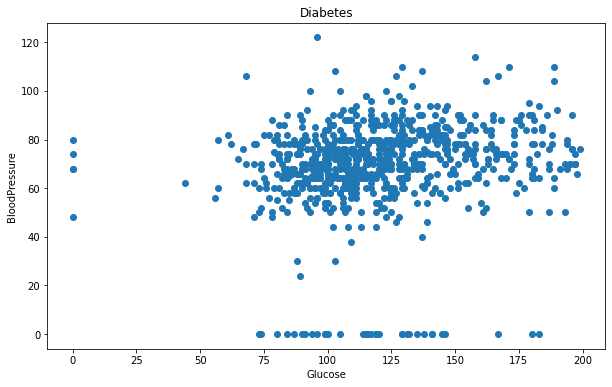

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Glucose'],df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Diabetes')

In [ ]:
X = df.iloc[:, [1,2]].values
X[:5]

array([[148,  72],
       [ 85,  66],
       [183,  64],
       [ 89,  66],
       [137,  40]], dtype=int64)

In [ ]:
X[1,1]

66

In [ ]:
len(X)

768

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.84832379  0.14964075]
 [-1.12339636 -0.16054575]
 [ 1.94372388 -0.26394125]
 ...
 [ 0.00330087  0.14964075]
 [ 0.1597866  -0.47073225]
 [-0.8730192   0.04624525]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


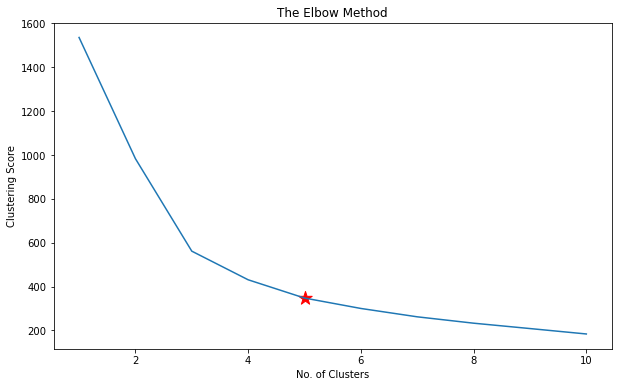

In [ ]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=0 )
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([1, 4, 1, 4, 0, 0, 4, 2, 1, 3, 3, 1, 3, 1, 1, 2, 3, 0, 2, 0, 3, 3,
       1, 3, 3, 0, 1, 4, 3, 3, 0, 1, 4, 3, 3, 0, 3, 4, 4, 0, 1, 3, 3, 1,
       1, 1, 0, 4, 0, 2, 3, 0, 4, 1, 1, 4, 1, 3, 3, 0, 2, 3, 4, 0, 0, 4,
       3, 3, 4, 3, 4, 0, 3, 3, 4, 4, 4, 4, 2, 0, 0, 2, 4, 0, 3, 0, 0, 4,
       0, 0, 4, 3, 4, 3, 3, 1, 4, 4, 0, 3, 1, 1, 3, 4, 4, 0, 3, 0, 4, 4,
       1, 1, 4, 4, 1, 3, 3, 4, 4, 4, 1, 0, 0, 3, 3, 2, 0, 0, 3, 3, 1, 0,
       1, 4, 4, 0, 4, 4, 3, 0, 3, 3, 0, 0, 1, 4, 4, 0, 1, 4, 3, 0, 1, 1,
       1, 1, 0, 0, 4, 1, 3, 4, 3, 0, 3, 4, 1, 0, 0, 3, 3, 0, 2, 4, 4, 1,
       4, 3, 3, 3, 4, 0, 4, 4, 3, 1, 1, 3, 3, 3, 0, 0, 1, 2, 4, 1, 0, 0,
       0, 0, 3, 3, 0, 4, 4, 0, 1, 1, 4, 1, 4, 3, 1, 0, 3, 1, 0, 0, 4, 0,
       1, 1, 2, 0, 4, 4, 4, 1, 1, 3, 3, 3, 4, 0, 4, 1, 1, 1, 1, 4, 4, 4,
       0, 0, 1, 1, 0, 1, 0, 3, 0, 3, 4, 4, 4, 0, 0, 0, 1, 1, 1, 2, 4, 3,
       0, 4, 2, 0, 0, 2, 3, 0, 3, 4, 0, 4, 0, 0, 0, 0, 1, 3, 3, 1, 3, 3,
       1, 3, 0, 0, 4, 0, 3, 0, 1, 1, 1, 3, 4, 0, 2,

In [ ]:
score = silhouette_score(X, pred)
print("Silhouette Score:", score)

Silhouette Score: 0.3438570030793114


In [ ]:
len(pred)

768

In [ ]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())

Number of data points in each cluster= 
 0    206
4    195
3    182
1    147
2     38
Name: Cluster, dtype: int64


Text(0.5, 1.0, 'Clusters')

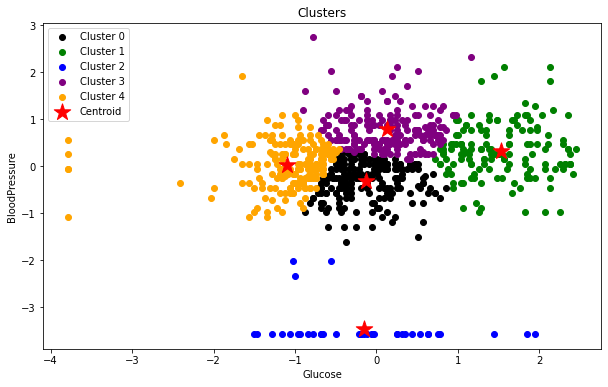

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'black', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.title('Clusters')

In [ ]:
kmeans.cluster_centers_[:,0]

array([-0.13313037,  1.52429955, -0.1573029 ,  0.12762964, -1.09691416])

In [ ]:
kmeans.cluster_centers_[:,1]

array([-0.31865052,  0.32266996, -3.458318  ,  0.79131777,  0.02874755])

In [ ]:
distance = []
max0 = max1 = max2 = max3 = max4 = 0
for i in range(0, len(X)):
    if pred[i]==0:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][0])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][0])**2)
        if d>max0:
            max0=d
    if pred[i]==1:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][1])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][1])**2)
        if d>max1:
            max1=d
    if pred[i]==2:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][2])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][2])**2)
        if d>max2:
            max2=d
    if pred[i]==3:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][3])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][3])**2)
        if d>max3:
            max3=d
    if pred[i]==4:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][4])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][4])**2)
        if d>max4:
            max4=d
    distance.append(d) 

In [ ]:
distance

[0.69776953977141,
 0.1911367578244351,
 0.7211306890798672,
 0.21348279324756064,
 1.3463612337499717,
 0.5720384106309515,
 1.0456989246754367,
 0.11746679271770387,
 0.9010336045746502,
 0.5990695979564765,
 0.6111182440067872,
 0.08574461464794422,
 0.49473807451532603,
 0.9990934086653357,
 0.20645575425678525,
 0.5096148921780084,
 0.21925765507545475,
 0.6464255745034793,
 1.4920375328538518,
 0.3684913995972586,
 0.18825379223297511,
 0.8131450923345499,
 1.120982922794324,
 0.2949026405869686,
 0.7510148797813855,
 0.44899204403360304,
 0.708078257340988,
 0.397103606121836,
 0.6390865491206884,
 0.4649095859089523,
 0.6676777411156463,
 0.36457095886682084,
 0.6066322040542288,
 1.1039902756690818,
 0.3442976126923527,
 0.4531967498883786,
 0.5961238534270801,
 0.6024759098427557,
 0.15581832042730515,
 0.5004629428913728,
 0.6708832741249383,
 0.2521386095605912,
 0.7116626788814816,
 1.792022077989994,
 0.6739008405615847,
 0.5826397513586872,
 0.9864548201821967,
 0.464971

In [ ]:
len(distance)

768

In [ ]:
max0

1.3463612337499717

In [ ]:
max1

1.8915919583496665

In [ ]:
max2

2.1041324302618416

In [ ]:
max3

2.144359100110763

In [ ]:
max4

2.9107799148375317

In [ ]:
l0 = float(input("Enter lambda 0 value: "))
l1 = float(input("Enter lambda 1 value: "))
l2 = float(input("Enter lambda 2 value: "))
l3 = float(input("Enter lambda 3 value: "))
l4 = float(input("Enter lambda 4 value: "))

Enter lambda 0 value: 0.8
Enter lambda 1 value: 1.3
Enter lambda 2 value: 1.6
Enter lambda 3 value: 1.6
Enter lambda 4 value: 2.4


Text(0.5, 1.0, 'Clusters')

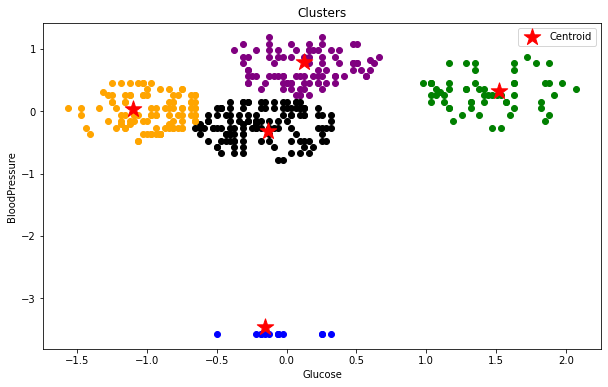

In [ ]:
c0=c1=c2=c3=c4=0
coordinates =[]
plt.figure(figsize=(10,6))
for i in range(0, len(X)):
    if pred[i]==0:
        if distance[i]<=max0-l0:
            plt.scatter(X[pred == 0, 0][c0], X[pred == 0, 1][c0], c = 'black')#, label = 'Cluster 0')
            coordinates.append((X[pred == 0, 0][c0],X[pred == 0, 1][c0]))
            c0=c0+1
        else:
            c0=c0+1
    if pred[i]==1:
        if distance[i]<=max1-l1:
            plt.scatter(X[pred == 1, 0][c1], X[pred == 1, 1][c1], c = 'green')#, label = 'Cluster 1')
            coordinates.append((X[pred == 1, 0][c1],X[pred == 1, 1][c1]))
            c1=c1+1
        else:
            c1=c1+1
    if pred[i]==2:
        if distance[i]<=max2-l2:
            plt.scatter(X[pred == 2, 0][c2], X[pred == 2, 1][c2], c = 'blue')#, label = 'Cluster 2')
            coordinates.append((X[pred == 2, 0][c2],X[pred == 2, 1][c2]))
            c2=c2+1
        else:
            c2=c2+1
    if pred[i]==3:
        if distance[i]<=max3-l3:
            plt.scatter(X[pred == 3, 0][c3], X[pred == 3, 1][c3], c = 'purple')#, label = 'Cluster 3')
            coordinates.append((X[pred == 3, 0][c3],X[pred == 3, 1][c3]))
            c3=c3+1
        else:
            c3=c3+1
    if pred[i]==4:
        if distance[i]<=max4-l4:
            plt.scatter(X[pred == 4, 0][c4], X[pred == 4, 1][c4], c = 'orange')# , label = 'Cluster 4')
            coordinates.append((X[pred == 4, 0][c4],X[pred == 4, 1][c4]))
            c4=c4+1
        else:
            c4=c4+1
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.title('Clusters')

In [ ]:
coordinates

[(-1.1233963609784168, -0.16054574674686284),
 (-0.9982077796701243, -0.16054574674686284),
 (-0.18448200116622385, -3.572597239872642),
 (1.4742667011686503, 0.2530362524198983),
 (0.5666494866835304, 0.5632227517949692),
 (1.411672410514504, 0.149640752628208),
 (-0.09059056518500455, 0.7700137513783497),
 (-0.18448200116622385, 0.046245252836517724),
 (0.15978659743158022, 0.9768047509617303),
 (-0.059293419857931455, 0.5632227517949692),
 (0.12848945210450713, 0.046245252836517724),
 (-0.7478306170535396, -0.16054574674686284),
 (-0.12188771051207764, 1.183595750545111),
 (1.1612952478979193, 0.35643175221158857),
 (0.034598016123287834, 0.45982725200327884),
 (-0.560047745091101, -0.47073224612193365),
 (-0.9669106343430512, -0.057150246955172554),
 (-0.30967058247451623, 0.149640752628208),
 (0.3788666147210919, 0.7700137513783497),
 (1.8498324450935275, -0.16054574674686284),
 (-1.56155639555744, 0.046245252836517724),
 (-0.560047745091101, -0.16054574674686284),
 (-0.4974534544

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


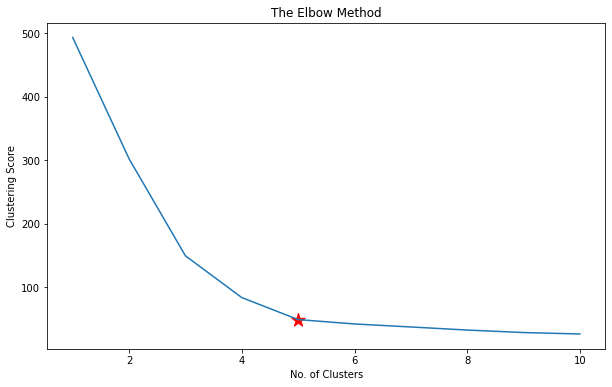

In [ ]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=0 )
    kmeans.fit(coordinates)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(coordinates)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(coordinates)

pred

array([1, 1, 2, 3, 4, 3, 4, 0, 4, 4, 0, 1, 4, 3, 4, 0, 1, 0, 4, 3, 1, 1,
       2, 1, 0, 0, 1, 4, 1, 1, 4, 4, 1, 1, 2, 0, 1, 1, 1, 0, 4, 1, 1, 4,
       3, 1, 1, 0, 3, 1, 1, 4, 3, 0, 4, 0, 0, 4, 3, 0, 3, 1, 1, 0, 1, 4,
       4, 0, 0, 1, 0, 0, 1, 3, 4, 1, 4, 0, 0, 4, 1, 3, 1, 4, 0, 3, 4, 0,
       0, 3, 3, 0, 0, 0, 4, 4, 0, 1, 0, 1, 4, 0, 0, 1, 0, 2, 1, 1, 4, 4,
       4, 0, 1, 3, 3, 3, 1, 1, 0, 0, 4, 4, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0,
       0, 4, 0, 1, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 3, 0, 0, 1, 0, 3,
       0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 2, 4, 3, 3, 1, 4, 1, 4, 2, 4, 1,
       1, 2, 1, 3, 0, 1, 3, 0, 1, 0, 4, 1, 3, 0, 0, 1, 0, 0, 1, 1, 3, 0,
       0, 3, 0, 0, 1, 1, 4, 3, 0, 1, 3, 0, 3, 1, 1, 0, 4, 1, 1, 0, 3, 1,
       1, 1, 4, 1, 1, 0, 0, 0, 3, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 3,
       0, 4, 0, 4, 4, 4, 3, 4, 3, 1, 1, 1, 0, 3, 0, 1, 3, 4, 1, 1, 0, 4,
       1, 1, 1, 3, 4, 4, 4, 2, 0, 1, 1, 0, 0, 0, 1, 4, 4, 1, 1, 3, 0, 3,
       0, 1, 4, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 3, 0,

In [ ]:
score = silhouette_score(coordinates, pred)
print("Silhouette Score:", score)

Silhouette Score: 0.5077390820378017


In [ ]:
kmeans.cluster_centers_[:,0]

array([-0.14723581, -0.94170674, -0.05688595,  1.43554311,  0.12304647])

In [ ]:
kmeans.cluster_centers_[:,1]

array([-0.21437977, -0.02192258, -3.57259724,  0.29772414,  0.69302906])

In [ ]:
from platform import python_version

print(python_version())

3.9.12
